# ECE 285 Assignment 1: Classification using Neural Network

Now that you have developed and tested your model on the toy dataset set. It's time to get down and get dirty with a standard dataset such as cifar10. At this point, you will be using the provided training data to tune the hyper-parameters of your network such that it works with cifar10 for the task of multi-class classification.

Important: Recall that now we have non-linear decision boundaries, thus we do not need to do one vs all classification. We learn a single non-linear decision boundary instead. Our non-linear boundaries (thanks to relu non-linearity) will take care of differentiating between all the classes

TO SUBMIT: PDF of this notebook with all the required outputs and answers.

In [1]:
# Prepare Packages
import numpy as np
import matplotlib.pyplot as plt
from ece285.utils.data_processing import get_cifar10_data
from ece285.utils.evaluation import get_classification_accuracy


%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 8.0)  # set default size of plots

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Use a subset of CIFAR10 for the assignment
dataset = get_cifar10_data(
    subset_train=5000,
    subset_val=250,
    subset_test=500,
)

print(dataset.keys())
print("Training Set Data  Shape: ", dataset["x_train"].shape)
print("Training Set Label Shape: ", dataset["y_train"].shape)
print("Validation Set Data  Shape: ", dataset["x_val"].shape)
print("Validation Set Label Shape: ", dataset["y_val"].shape)
print("Test Set Data  Shape: ", dataset["x_test"].shape)
print("Test Set Label Shape: ", dataset["y_test"].shape)

dict_keys(['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test'])
Training Set Data  Shape:  (5000, 3072)
Training Set Label Shape:  (5000,)
Validation Set Data  Shape:  (250, 3072)
Validation Set Label Shape:  (250,)
Test Set Data  Shape:  (500, 3072)
Test Set Label Shape:  (500,)


In [2]:
x_train = dataset["x_train"]
y_train = dataset["y_train"]
x_val = dataset["x_val"]
y_val = dataset["y_val"]
x_test = dataset["x_test"]
y_test = dataset["y_test"]


In [3]:
# Import more utilies and the layers you have implemented
from ece285.layers.sequential import Sequential
from ece285.layers.linear import Linear
from ece285.layers.relu import ReLU
from ece285.layers.softmax import Softmax
from ece285.layers.loss_func import CrossEntropyLoss
from ece285.utils.optimizer import SGD
from ece285.utils.dataset import DataLoader
from ece285.utils.trainer import Trainer


## Visualize some examples from the dataset.

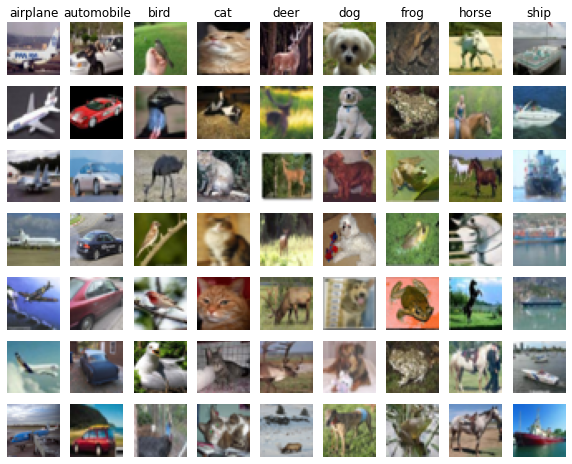

In [4]:
# We show a few examples of training images from each class.
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
]
samples_per_class = 7


def visualize_data(dataset, classes, samples_per_class):
    num_classes = len(classes)
    for y, cls in enumerate(classes):
        idxs = np.flatnonzero(y_train == y)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(dataset[idx])
            plt.axis("off")
            if i == 0:
                plt.title(cls)
    plt.show()


# Visualize the first 10 classes
visualize_data(
    x_train.reshape(5000, 3, 32, 32).transpose(0, 2, 3, 1),
    classes,
    samples_per_class,
)


## Initialize the model

In [5]:
input_size = 3072
hidden_size = 100  # Hidden layer size (Hyper-parameter)
num_classes = 10  # Output

# For a default setting we use the same model we used for the toy dataset.
# This tells you the power of a 2 layered Neural Network. Recall the Universal Approximation Theorem.
# A 2 layer neural network with non-linearities can approximate any function, given large enough hidden layer
def init_model():
    # np.random.seed(0) # No need to fix the seed here
    l1 = Linear(input_size, hidden_size)
    l2 = Linear(hidden_size, num_classes)

    r1 = ReLU()
    softmax = Softmax()
    return Sequential([l1, r1, l2, softmax])


In [6]:
# Initialize the dataset with the dataloader class
dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)
net = init_model()
optim = SGD(net, lr=0.01, weight_decay=0.01)
loss_func = CrossEntropyLoss()
epoch = 200  # (Hyper-parameter)
batch_size = 200  # (Reduce the batch size if your computer is unable to handle it)


In [7]:
# Initialize the trainer class by passing the above modules
trainer = Trainer(
    dataset, optim, net, loss_func, epoch, batch_size, validate_interval=3
)


In [8]:
# Call the trainer function we have already implemented for you. This trains the model for the given
# hyper-parameters. It follows the same procedure as in the last ipython notebook you used for the toy-dataset
train_error, validation_accuracy = trainer.train()


Epoch Average Loss: 2.302531
Validate Acc: 0.088
Epoch Average Loss: 2.302356
Epoch Average Loss: 2.302145
Epoch Average Loss: 2.301851
Validate Acc: 0.104
Epoch Average Loss: 2.301427
Epoch Average Loss: 2.300823
Epoch Average Loss: 2.299952
Validate Acc: 0.096
Epoch Average Loss: 2.298785
Epoch Average Loss: 2.297274
Epoch Average Loss: 2.295472
Validate Acc: 0.080
Epoch Average Loss: 2.293343
Epoch Average Loss: 2.290780
Epoch Average Loss: 2.287763
Validate Acc: 0.084
Epoch Average Loss: 2.283824
Epoch Average Loss: 2.278774
Epoch Average Loss: 2.272569
Validate Acc: 0.096
Epoch Average Loss: 2.265654
Epoch Average Loss: 2.258190
Epoch Average Loss: 2.250503
Validate Acc: 0.100
Epoch Average Loss: 2.242931
Epoch Average Loss: 2.235477
Epoch Average Loss: 2.228374
Validate Acc: 0.124
Epoch Average Loss: 2.221686
Epoch Average Loss: 2.215566
Epoch Average Loss: 2.209918
Validate Acc: 0.124
Epoch Average Loss: 2.204683
Epoch Average Loss: 2.199994
Epoch Average Loss: 2.195272
Validate

### Print the training and validation accuracies for the default hyper-parameters provided

In [9]:
from ece285.utils.evaluation import get_classification_accuracy

out_train = net.predict(x_train)
acc = get_classification_accuracy(out_train, y_train)
print("Training acc: ", acc)
out_val = net.predict(x_val)
acc = get_classification_accuracy(out_val, y_val)
print("Validation acc: ", acc)


Training acc:  0.3448
Validation acc:  0.316


### Debug the training
With the default parameters we provided above, you should get a validation accuracy of around ~0.2 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the training loss function and the validation accuracies during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

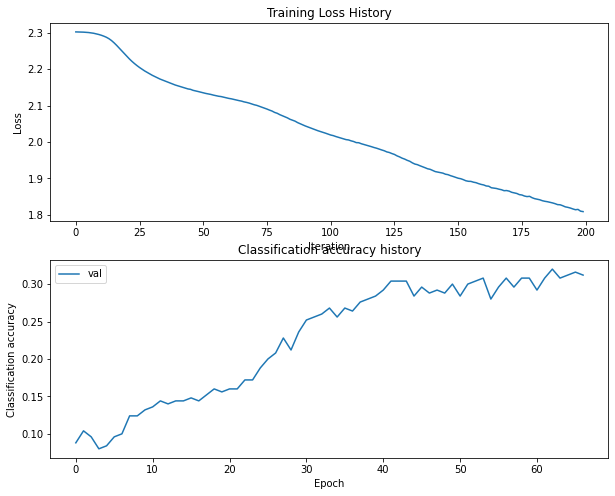

In [10]:
# Plot the training loss function and validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_error)
plt.title("Training Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")



plt.subplot(2, 1, 2)
# plt.plot(stats['train_acc_history'], label='train')
plt.plot(validation_accuracy, label="val")
plt.title("Classification accuracy history")
plt.xlabel("Epoch")
plt.ylabel("Classification accuracy")
plt.legend()
plt.show()


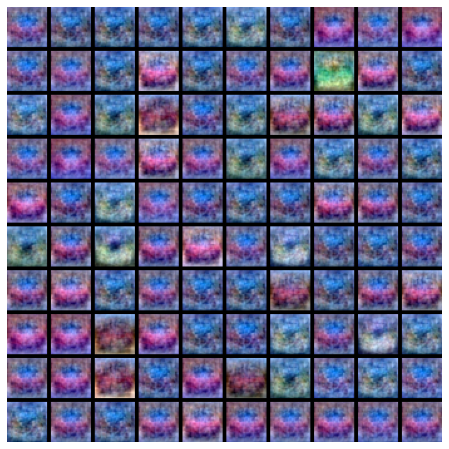

In [11]:
from ece285.utils.vis_utils import visualize_grid

# Credits: http://cs231n.stanford.edu/

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net._modules[0].parameters[0]
    W1 = W1.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
    plt.imshow(visualize_grid(W1, padding=3).astype("uint8"))
    plt.gca().axis("off")
    plt.show()


show_net_weights(net)


# Tune your hyperparameters (50%)

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 40% on the validation set. Our best network gets over 40% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on cifar10 as you can (40% could serve as a reference), with a fully-connected Neural Network.

#### Explain your hyperparameter tuning process below.

#### Your Answer:
Generally speaking, we can optimize through grid search, which is a model hyperparameter optimization technique. This technique is provided in scikit-learn via the GridSearchCV class. But here we do not use this method, we use the permutation and combination test to select the setting range of the parameters through rough running. Because the number of hyperparameters here is not very large, our previous test shows that weight_decay will have a more significant impact only when it is relatively large, and epoches will be fine as long as it can converge, so we focus on the learning rate. The parameters of the hidden layer and learning rate are compared with the benchmark one by one, and the best parameters are selected within the range.


In [12]:
best_net_hyperparams = None  # store the best model into this

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model hyperparams in best_net.                                                #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# You are now free to test different combinations of hyperparameters to build   #
# various models and test them according to the above plots and visualization   #


def multi_classifier_test(hidden_size, epoch, lr, weight_decay ):
    input_size = 3072
    hidden_size = 50
    num_classes = 10 # Output
    def initialize_model():
        l1 = Linear(input_size, hidden_size)
        l2 = Linear(hidden_size, num_classes)
        r1 = ReLU()
        softmax = Softmax()
        return Sequential([l1, r1, l2, softmax])
    
    dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)
    net = initialize_model()
    optim = SGD(net, lr, weight_decay)
    loss_func = CrossEntropyLoss()
    batch_size = 200 
    trainer = Trainer(dataset, optim, net, loss_func, epoch, batch_size, validate_interval=3)
    train_error, validation_accuracy = trainer.train()

    
    out_train = net.predict(x_train)
    acc = get_classification_accuracy(out_train, y_train)
lrs = [0.01,0.1,1]
weight_ds = [0,0.00001,0.001,0.1]
epoches= [100,300,600]
hiddens =[20,50,100]

for lr in lrs :
    for weight in weight_ds:
        for ep in epoches:
            for hidden in hiddens:
                multi_classifier_test(hidden, ep, lr,weight)
best_net_hyperparams  = [100, 600,0.02,0.00001]

# TODO: Show the above plots and visualizations for the default params (already #
# done) and the best hyper-params you obtain. You only need to show this for 2  #
# sets of hyper-params.                                                         #
# You just need to store values for the hyperparameters in best_net_hyperparams #
# as a list in the order
# best_net_hyperparams = [lr, weight_decay, epoch, hidden_size]
#################################################################################
# lr, weight_decay, epoch, hidden_size

# multi_classifier_test(100, 600,0.02,0.00001)




In [24]:
input_size = 3072
hidden_size = 150 # Hidden layer size (Hyper-parameter)
num_classes = 10 # Output

# For a default setting we use the same model we used for the toy dataset.
# This tells you the power of a 2 layered Neural Network. Recall the Universal Approximation Theorem.
# A 2 layer neural network with non-linearities can approximate any function, given large enough hidden layer
def init_model():
    #np.random.seed(0) # No need to fix the seed here
    l1 = Linear(input_size, hidden_size)
    l2 = Linear(hidden_size, num_classes)
    r1 = ReLU()
    softmax = Softmax()
    return Sequential([l1, r1, l2, softmax])



In [25]:
# Initialize the dataset with the dataloader class
dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)
net = init_model() 
optim = SGD(net, lr=0.02, weight_decay=0.00001)
loss_func = CrossEntropyLoss()
epoch = 600 # (Hyper-parameter)
batch_size = 200 # (Reduce the batch size if your computer is unable to handle it)
trainer = Trainer(dataset, optim, net, loss_func, epoch, batch_size, validate_interval=3)
train_error, validation_accuracy = trainer.train()

Epoch Average Loss: 2.302424
Validate Acc: 0.104
Epoch Average Loss: 2.301835
Epoch Average Loss: 2.300716
Epoch Average Loss: 2.298606
Validate Acc: 0.100
Epoch Average Loss: 2.295375
Epoch Average Loss: 2.290821
Epoch Average Loss: 2.283619
Validate Acc: 0.096
Epoch Average Loss: 2.272334
Epoch Average Loss: 2.257789
Epoch Average Loss: 2.242334
Validate Acc: 0.104
Epoch Average Loss: 2.226966
Epoch Average Loss: 2.214608
Epoch Average Loss: 2.203189
Validate Acc: 0.132
Epoch Average Loss: 2.194117
Epoch Average Loss: 2.185265
Epoch Average Loss: 2.177876
Validate Acc: 0.140
Epoch Average Loss: 2.170908
Epoch Average Loss: 2.165199
Epoch Average Loss: 2.159483
Validate Acc: 0.144
Epoch Average Loss: 2.154565
Epoch Average Loss: 2.150010
Epoch Average Loss: 2.145833
Validate Acc: 0.148
Epoch Average Loss: 2.141101
Epoch Average Loss: 2.136913
Epoch Average Loss: 2.133774
Validate Acc: 0.148
Epoch Average Loss: 2.130042
Epoch Average Loss: 2.127247
Epoch Average Loss: 2.123366
Validate

Epoch Average Loss: 1.414250
Epoch Average Loss: 1.413839
Validate Acc: 0.408
Epoch Average Loss: 1.430787
Epoch Average Loss: 1.418008
Epoch Average Loss: 1.421266
Validate Acc: 0.412
Epoch Average Loss: 1.408665
Epoch Average Loss: 1.407195
Epoch Average Loss: 1.390630
Validate Acc: 0.408
Epoch Average Loss: 1.415166
Epoch Average Loss: 1.415802
Epoch Average Loss: 1.401828
Validate Acc: 0.388
Epoch Average Loss: 1.388612
Epoch Average Loss: 1.375573
Epoch Average Loss: 1.409641
Validate Acc: 0.428
Epoch Average Loss: 1.383588
Epoch Average Loss: 1.382151
Epoch Average Loss: 1.396029
Validate Acc: 0.408
Epoch Average Loss: 1.390813
Epoch Average Loss: 1.420382
Epoch Average Loss: 1.377931
Validate Acc: 0.396
Epoch Average Loss: 1.413851
Epoch Average Loss: 1.362584
Epoch Average Loss: 1.370588
Validate Acc: 0.400
Epoch Average Loss: 1.370276
Epoch Average Loss: 1.371813
Epoch Average Loss: 1.374012
Validate Acc: 0.440
Epoch Average Loss: 1.364586
Epoch Average Loss: 1.395401
Epoch Av

Epoch Average Loss: 0.942895
Epoch Average Loss: 0.945054
Epoch Average Loss: 0.943004
Validate Acc: 0.376
Epoch Average Loss: 0.939457
Epoch Average Loss: 0.918545
Epoch Average Loss: 0.942492
Validate Acc: 0.416
Epoch Average Loss: 0.900098
Epoch Average Loss: 0.953874
Epoch Average Loss: 0.930251
Validate Acc: 0.404
Epoch Average Loss: 0.918863
Epoch Average Loss: 0.916383
Epoch Average Loss: 0.890984
Validate Acc: 0.396
Epoch Average Loss: 0.906598
Epoch Average Loss: 0.903999
Epoch Average Loss: 0.902871
Validate Acc: 0.420
Epoch Average Loss: 0.898268
Epoch Average Loss: 0.941021
Epoch Average Loss: 0.912766
Validate Acc: 0.456
Epoch Average Loss: 0.871015
Epoch Average Loss: 0.856790
Epoch Average Loss: 0.933929
Validate Acc: 0.404
Epoch Average Loss: 0.900756
Epoch Average Loss: 0.887766
Epoch Average Loss: 0.882908
Validate Acc: 0.412
Epoch Average Loss: 0.900204
Epoch Average Loss: 0.881372
Epoch Average Loss: 0.881014
Validate Acc: 0.412
Epoch Average Loss: 0.870654
Epoch Av

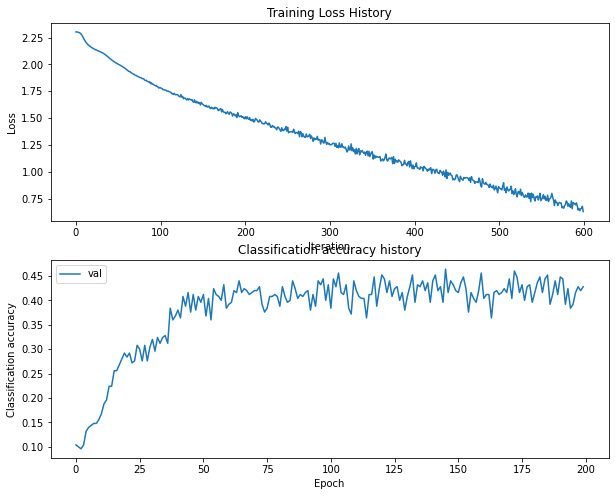

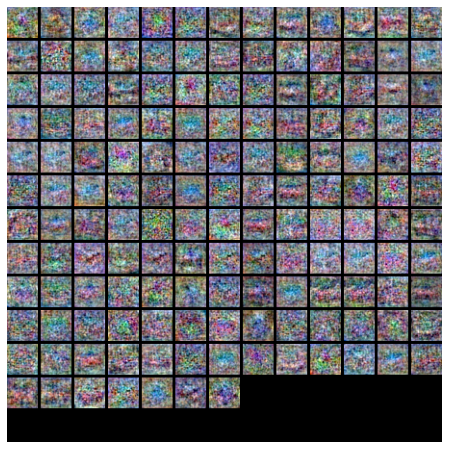

In [26]:
# TODO: Plot the training_error and validation_accuracy of the best network (5%)

plt.subplot(2, 1, 1)
plt.plot(train_error)
plt.title('Training Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.subplot(2, 1, 2)

plt.plot(validation_accuracy, label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()
# TODO: visualize the weights of the best network (5%)
show_net_weights(net)


# Run on the test set (30%)
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 35%.

In [32]:
best_net = net
test_acc = (best_net.predict(x_test) == y_test).mean()
print("Test accuracy: ", test_acc)


Test accuracy:  0.382


#### Inline Question (10%)

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.



#### Your Answer:
1 and 3

#### Your Explanation:
For choice 1, if the dataset is not large enough, this may not able to cover the important features of testing data, which means the data dept is not enough. So hopefully we can train model on a larger dataset to solve this problem.

For choice 3, the bad performence may caused by overfitting, so the model perform well in traning data but bad in testing data. We can increase the regularization strength to avoid the model overfitting.